In [72]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

# Davor Jordacevic 2016/201251

In [73]:
A=np.matrix([[0.,1.,0.,0.] , [3.,0.,0.,2.] , [0.,0.,0.,1.] , [0.,-2.,0.,0.]])
B=np.matrix([[0.],[0.],[0.],[1.]])
C=np.matrix([[0.,0.,1.,0.]])
D=np.matrix([0])
print('A:\n',A)
print('B:\n',B)
print('C:\n',C)
print('D:\n',D)
G=signal.lti(A,B,C,D)

A:
 [[ 0.  1.  0.  0.]
 [ 3.  0.  0.  2.]
 [ 0.  0.  0.  1.]
 [ 0. -2.  0.  0.]]
B:
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]
C:
 [[ 0.  0.  1.  0.]]
D:
 [[0]]


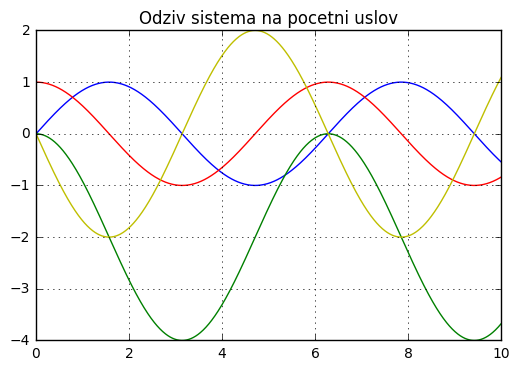

In [74]:
#a)
x0=np.matrix([0,1,0,0])
t=np.linspace(0,10,1000)
tt,y,x= signal.lsim(G,U=None,T=t,X0=x0)
plt.plot(tt,x[:,0],'b',tt,x[:,1],'r',tt,x[:,2],'g',tt,x[:,3],'y')
plt.title("Odziv sistema na pocetni uslov")
plt.grid()
plt.show()

In [75]:
#b)
wn=1
zeta=0.8
p1= -wn*zeta+1j*wn*np.sqrt(1-zeta**2)
p2= -wn*zeta-1j*wn*np.sqrt(1-zeta**2)
p3= -4*wn*zeta
p4= -4.5*wn*zeta
P=np.array([p1,p2,p3,p4])

Matrica pojacanja K: [[ 25.216  13.12   -3.84    8.4  ]]
Polovi sistema: [-3.6+0.j  -3.2+0.j  -0.8-0.6j -0.8+0.6j]


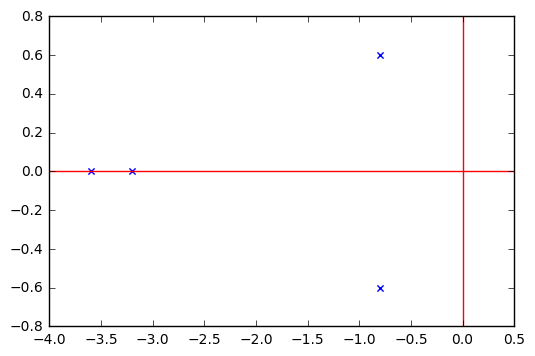

In [76]:
#c)
fsf1 = signal.place_poles(A,B,P)
K=fsf1.gain_matrix
print("Matrica pojacanja K:",K)
print("Polovi sistema:",fsf1.computed_poles)
plt.scatter(fsf1.computed_poles.real,fsf1.computed_poles.imag,marker="x")
plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

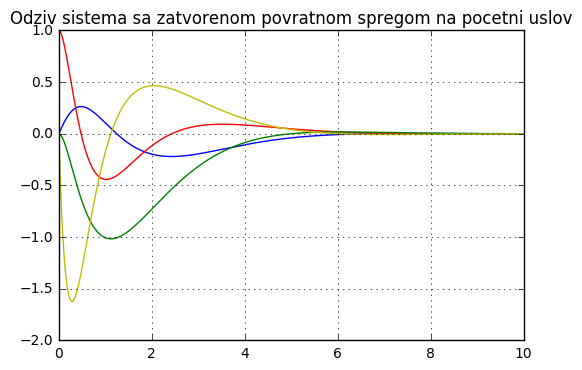

In [77]:
Ak=A-B*K
G=signal.lti(Ak,B,C,D)
tt,y,x= signal.lsim(G,U=None,T=t,X0=x0)
plt.plot(tt,x[:,0],'b',tt,x[:,1],'r',tt,x[:,2],'g',tt,x[:,3],'y')
plt.title("Odziv sistema sa zatvorenom povratnom spregom na pocetni uslov")
plt.grid()
plt.show()

Matrica pojacanja L:
 [[-1072.96]
 [-1409.12]
 [   42.  ]
 [  575.36]]
Polovi estimatora: [-18.+0.j  -16.+0.j   -4.-0.6j  -4.+0.6j]


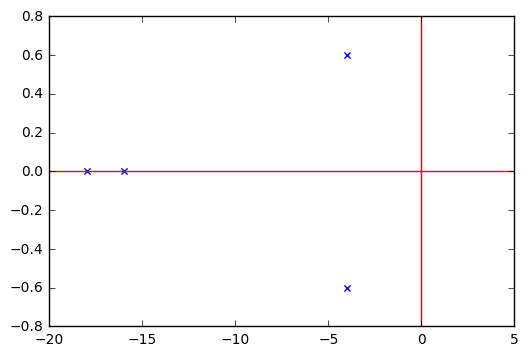

In [78]:
p1e= -5*wn*zeta+1j*wn*np.sqrt(1-zeta**2)
p2e= -5*wn*zeta-1j*wn*np.sqrt(1-zeta**2)
p3e= -5*4*wn*zeta
p4e= -5*4.5*wn*zeta
Pe= np.array([p1e,p2e,p3e,p4e])
fsf1= signal.place_poles(A.T, C.T, Pe)
L= fsf1.gain_matrix
L= L.T
print("Matrica pojacanja L:\n",L)
print("Polovi estimatora:",fsf1.computed_poles)
plt.scatter(fsf1.computed_poles.real,fsf1.computed_poles.imag,marker="x")
plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

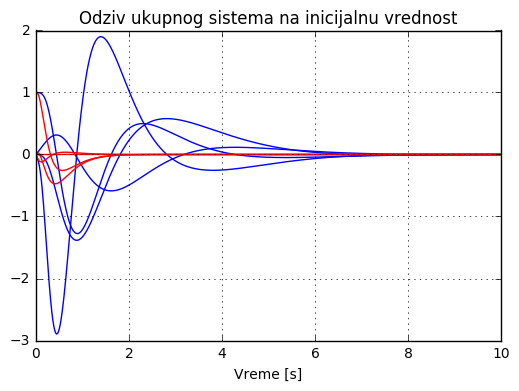

In [79]:
A1u=np.concatenate((A-B*K,B*K),axis=1)
A2u=np.concatenate((np.matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]), A-L*C),axis=1)
Au=np.concatenate((A1u,A2u),axis=0)
Bu=np.concatenate((B, B),axis=0)
Cu=np.matrix([[1,0,0,0,0,0,0,0]])
Du=np.matrix([[0]])
G=signal.lti(Au,Bu,Cu,Du)

x0=np.matrix([0,1,0,0,0,1,0,0])
tt,y,x=signal.lsim(G,U=None,T=t,X0=x0)

plt.plot(tt,x[:,0:4],'b', tt,x[:,4:8],'r')

plt.title("Odziv ukupnog sistema na inicijalnu vrednost")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()